In [23]:
import pandas as pd
import os

In [24]:
annotations_file_path = '/content/_annotations.csv'
annotations_df = pd.read_csv(annotations_file_path)

In [25]:
csv_image_files = annotations_df['filename'].unique()
directory_contents = os.listdir('/content/images')
directory_image_files = set(directory_contents)

In [26]:
# Check for missing images
missing_images = [img for img in csv_image_files if img not in directory_image_files]

if missing_images:
    print(f"Missing images: {missing_images}")
else:
    print("All images are present.")

Missing images: ['Kitchen-15-_jpg.rf.003185a6945c91ef260365a4aa9adae7.jpg', 'Toilet-30-_jpg.rf.003a9c0c9a664caeb66f39465af3bfa0.jpg', 'Toilet-113-_jpg.rf.010a8fa0bef51932dd861e54c3324f76.jpg', 'Toilet-297-_jpg.rf.013051ee180b79e97205440422f0f925.jpg', 'Toilet-8-_jpg.rf.00ad093952cfdae6ba85ae8f87e37b9f.jpg', 'Toilet-293-_jpg.rf.00ce1a4b49606a0f784c55f37ef8f1c9.jpg', 'Toilet-493-_jpg.rf.01242380da21724f8cb600ce157b08d9.jpg', 'Toilet-171-_jpg.rf.015f0659374c07f0b802209cf58bb9d0.jpg', 'Kitchen-306-_jpg.rf.01aa0fa3a123d011ade2ea913fe5dcfb.jpg', 'Kitchen-277-_jpg.rf.01f15a18c44be5581c9bd19ab9152d05.jpg', 'Room2-164-_jpg.rf.01fb9aa60c27e91eb4bf97e495dbf4a5.jpg', 'Room2-203-_jpg.rf.0112e2dd0e6c38ab5870b143974c5a81.jpg', 'Toilet-202-_jpg.rf.01dc8b0e8a35410b6154fd43e9fb80ff.jpg', 'img_wm_revamp-2022-08-19T223528-993_jpg.rf.02399a0fc907dbcdfbf53900aaa983fa.jpg', 'img_wm_revamp-98-_jpg.rf.01f53386a91f232104a655558a8e29d9.jpg', 'img_wm_revamp-92-_jpg.rf.0216a3b33fab5d3346c442eb25bdc806.jpg', 'Kitch

**Data Augmentation**

In [27]:
import cv2
import numpy as np

In [28]:
# Function to rotate an image
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [29]:
# Function to flip an image
def flip_image(image, flip_code):
    return cv2.flip(image, flip_code)

In [30]:
# Function to add random noise to an image
def add_noise(image):
    row, col, ch = image.shape
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss * 255
    return np.clip(noisy, 0, 255).astype(np.uint8)

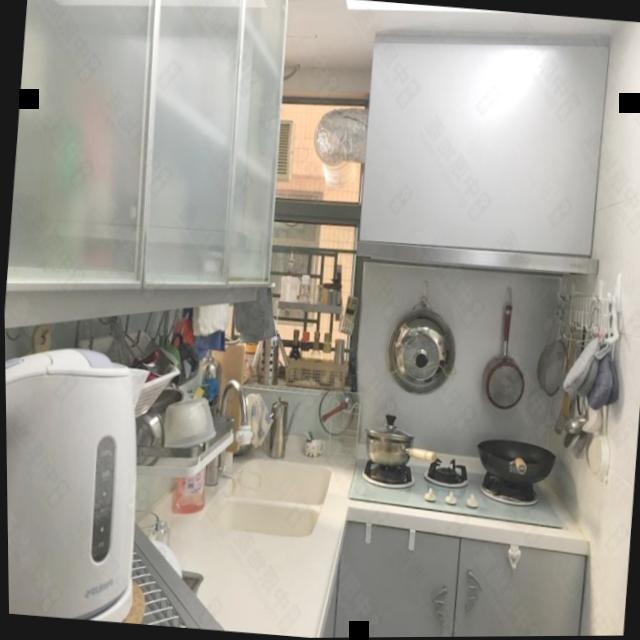

In [31]:
# Example usage
image_path = '/content/images/103_jpg.rf.3d82e8b544baf43123536c94f4889d9f.jpg'
image = cv2.imread(image_path)
from google.colab.patches import cv2_imshow
cv2_imshow(image)

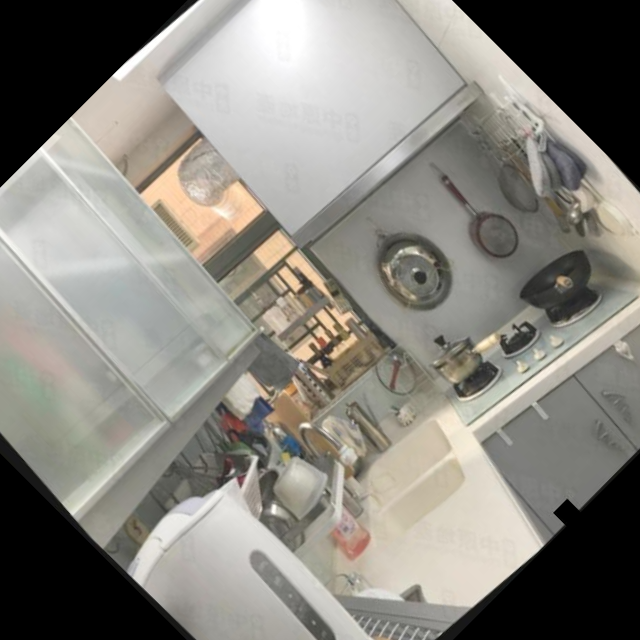

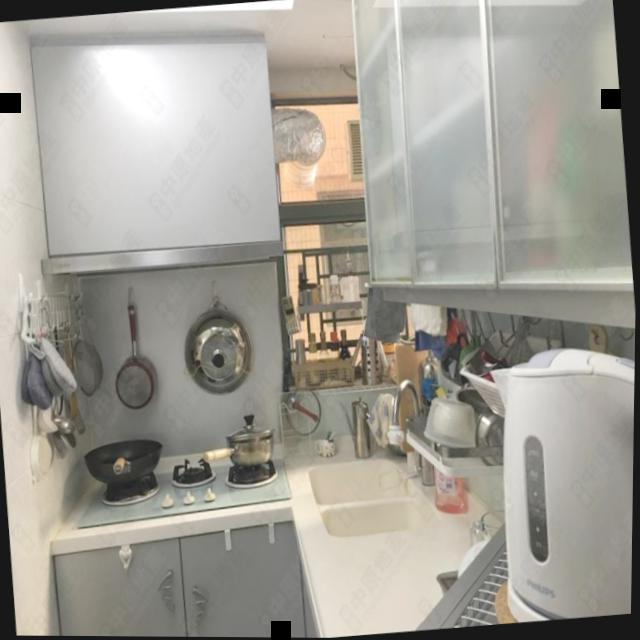

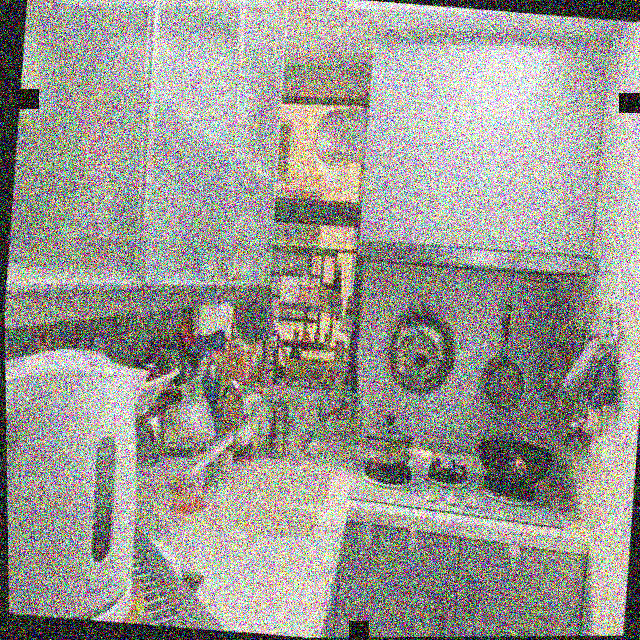

In [32]:
rotated_image = rotate_image(image, 45)
flipped_image = flip_image(image, 1)
noisy_image = add_noise(image)
cv2_imshow(rotated_image)
cv2_imshow(flipped_image)
cv2_imshow(noisy_image)

**Feature Extraction**

*Using SIFT (Scale-Invariant Feature Transform)*

In [33]:
import cv2

def extract_sift_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

# Example usage
image_path = '/content/images/103_jpg.rf.3d82e8b544baf43123536c94f4889d9f.jpg'
keypoints, descriptors = extract_sift_features(image_path)
print(f"Extracted {len(keypoints)} keypoints and descriptors")

Extracted 1212 keypoints and descriptors


*Using HOG (Histogram of Oriented Gradients)*

In [34]:
def extract_hog_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(image)
    return hog_features

# Example usage
image_path = '/content/images/103_jpg.rf.3d82e8b544baf43123536c94f4889d9f.jpg'
hog_features = extract_hog_features(image_path)
print(f"Extracted HOG features with shape: {hog_features.shape}")

Extracted HOG features with shape: (17936100,)
